In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("Week 2 Data Cleaned.xlsx")
data

,Radius (km),T(K),P (bar),1A,1B,1C,2A,2B,2C,2D,2E
0,6060.006,665.213000,52.486000,-50,-500,-120,-450.000,-448.3410,-448.34100,-448.34100,-313.83870
1,6059.525,668.861000,54.268000,-50,-500,-140,-456.795,-454.0490,-454.04900,-454.04900,-340.53675
2,6058.946,673.664000,56.478000,-50,-500,-160,-463.590,-461.5630,-461.56300,-461.56300,-369.25040
3,6058.453,677.466000,58.413000,-50,-500,-180,-470.385,-467.5099,-467.50990,-467.50990,-392.70832
4,6057.984,681.668000,60.311000,-50,-500,-200,-477.180,-474.0810,-474.08100,-474.08100,-412.45047
5,6057.526,685.203000,62.207000,-50,-500,-220,-483.975,-479.6089,-479.60890,-479.60890,-426.85192
6,6057.003,689.881000,64.429000,-50,-500,-240,-490.770,-486.9234,-486.92340,-486.92340,-438.23106
7,6056.555,694.885000,66.387000,-50,-500,-260,-497.565,-494.7450,-494.74500,-494.74500,-445.51787
8,6056.025,698.846000,68.758000,-50,-500,-280,-504.360,-500.9360,-500.93600,-500.93600,-451.48360
9,6055.510,703.736000,71.130000,-50,-500,-300,-511.155,-508.5780,-508.57800,-513.66378,-458.73736


### Calculating the fO2(gas) at each elevation

**Deriving fO2(gas):**

$
\begin{align}
\text{EMF}_{(\text{sensor})} = \frac{RT}{nF} \left[ \ln f_{O_2(gas)} - \ln f_{O_2(ref)} \right]
\end{align}
$

$
\begin{align}
\frac{\text{EMF} \cdot nF}{RT} = \ln f_{O_2(gas)} - \ln f_{O_2(ref)}
\end{align}
$

$
\begin{align}
\ln f_{O_2(gas)} = \frac{\text{EMF} \cdot nF}{RT} + \ln f_{O_2(ref)}
\end{align}
$

$
\begin{align}
f_{O_2(gas)} = e^{\ln f_{O_2(ref)} + \frac{\text{EMF} \cdot nF}{RT}}= f_{O_2(ref)} e^{\frac{\text{EMF} \cdot nF}{RT}}
\end{align}
$

**Deriving fO2(ref)**

$
\begin{align}
\log_{10} f_{O_2(ref)} = 16.510 - \frac{12473.4}{T} - 1.826 \log_{10} T + P \left( \frac{0.0627}{T} + 5.22 \times 10^{-7} (1 - \frac{298}{T}) + 10^{-8} \left( \frac{P}{T} \right) \right)
\end{align}
$

**Assigning right side of the equation to a variable X,**

$
\begin{align}
f_{O_2(ref)} = 10^{X}
\end{align}
$

**fO2(ref) is then substituted into the fO2(gas) equation along with known constants and given data to derive all of the different fO2(gas) from the sensor readings. This process is documented below:**

In [12]:
# Assigning variables to constants and sensor readings
R = 8.31451
F = 96485.309
n = 4
P = data["P (bar)"]
T = data["T(K)"]

# Convert EMF from mV to V
data["1A"] = data["1A"]/1000 
data["1B"] = data["1B"]/1000
data["1C"] = data["1C"]/1000

# Deriving fO2(ref)
data["logfO2ref"] = 16.510 - (12473.4 / T) - (1.826 * np.log10(T)) + P * ((0.0627 / T) - 5.22e-7 * (1 - 298 / T) + 1e-8 * P / T)
data["fO2ref"] = 10**data["logfO2ref"]

# Deriving fO2(gas)
data["fO2gas_1A"] = data["fO2ref"]*np.exp((data["1A"]*4*F)/(R*T))
data["fO2gas_1B"] = data["fO2ref"]*np.exp((data["1B"]*4*F)/(R*T))
data["fO2gas_1C"] = data["fO2ref"]*np.exp((data["1C"]*4*F)/(R*T))

# Showing fO2(gas)
V1fO2gas = data[['fO2gas_1A', 'fO2gas_1B', 'fO2gas_1C']].copy()
V1fO2gas

,fO2gas_1A,fO2gas_1B,fO2gas_1C
0,1.241626e-09,2.863748e-23,9.390116e-12
1,1.586084e-09,4.341576e-23,3.074613e-12
2,2.180338e-09,7.456629e-23,1.113883e-12
3,2.795882e-09,1.137915e-22,3.785981e-13
4,3.667949e-09,1.805330e-22,1.344212e-13
5,4.597231e-09,2.650243e-22,4.581595e-14
6,6.175567e-09,4.377636e-22,1.732576e-14
7,8.429499e-09,7.431154e-22,6.816904e-15
8,1.075064e-08,1.123782e-21,2.493605e-15
9,1.445831e-08,1.860217e-21,9.970083e-16


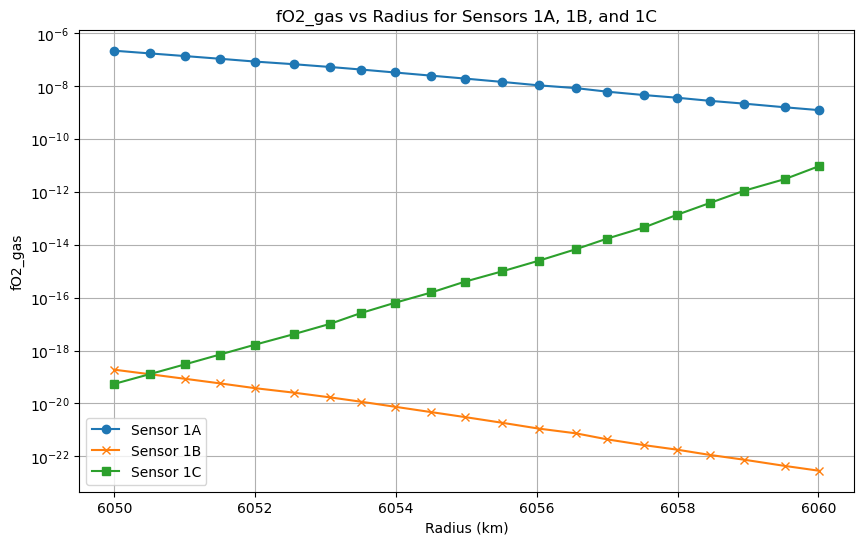

In [14]:
plt.figure(figsize=(10, 6))

# Plotting fO2_gas against radius for sensors 1A, 1B, and 1C on logarithmic scale
plt.plot(data['Radius (km)'], data['fO2gas_1A'], label='Sensor 1A', marker='o')
plt.plot(data['Radius (km)'], data['fO2gas_1B'], label='Sensor 1B', marker='x')
plt.plot(data['Radius (km)'], data['fO2gas_1C'], label='Sensor 1C', marker='s')

# Plot creation
plt.title('fO2_gas vs Radius for Sensors 1A, 1B, and 1C')
plt.xlabel('Radius (km)')
plt.ylabel('fO2_gas')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### The following now applies to sensors 2A-2E: Calculating the fO2(gas) at each elevation

In [20]:
# Converting EMF from mV to V
data["2A"] = data["2A"]/1000
data["2B"] = data["2B"]/1000
data["2C"] = data["2C"]/1000
data["2D"] = data["2D"]/1000
data["2E"] = data["2E"]/1000

# Calculating fO2(gas)
data["fO2gas_2A"] = data["fO2ref"]*np.exp((data["2A"]*4*F)/(R*T))
data["fO2gas_2B"] = data["fO2ref"]*np.exp((data["2B"]*4*F)/(R*T))
data["fO2gas_2C"] = data["fO2ref"]*np.exp((data["2C"]*4*F)/(R*T))
data["fO2gas_2D"] = data["fO2ref"]*np.exp((data["2D"]*4*F)/(R*T))
data["fO2gas_2E"] = data["fO2ref"]*np.exp((data["2E"]*4*F)/(R*T))

# Showing calculated fO2(gas) for sensors 2A - 2E
V2fO2gas = data[['fO2gas_2A', 'fO2gas_2B', 'fO2gas_2C', 'fO2gas_2D', 'fO2gas_2E']].copy()
V2fO2gas

,fO2gas_2A,fO2gas_2B,fO2gas_2C,fO2gas_2D,fO2gas_2E
0,9.379146e-22,1.053025e-21,1.053025e-21,1.053025e-21,1.254506e-17
1,8.705932e-22,1.053362e-21,1.053362e-21,1.053362e-21,2.778151e-18
2,9.164105e-22,1.053772e-21,1.053772e-21,1.053772e-21,6.097422e-19
3,8.656602e-22,1.054145e-21,1.054145e-21,1.054145e-21,1.773090e-19
4,8.539123e-22,1.054533e-21,1.054533e-21,1.054533e-21,7.009097e-20
5,7.847813e-22,1.054876e-21,1.054876e-21,1.054876e-21,3.761286e-20
6,8.146090e-22,1.055238e-21,1.055238e-21,1.055238e-21,2.793754e-20
7,8.743734e-22,1.055618e-21,1.055618e-21,1.055618e-21,2.828867e-20
8,8.412267e-22,1.056044e-21,1.056044e-21,1.056044e-21,2.819628e-20
9,8.912944e-22,1.056431e-21,1.056431e-21,7.553626e-22,2.828524e-20


### Plotting fO2(gas) vs. elevation or radius

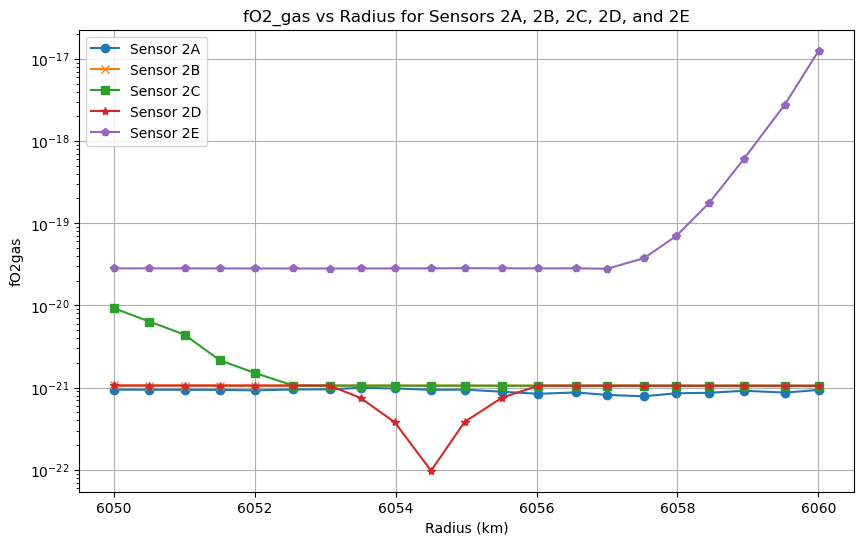

In [23]:
plt.figure(figsize=(10, 6))

# Plot for sensor 2A - 2E on logarithmic scale
plt.plot(data['Radius (km)'], data['fO2gas_2A'], label='Sensor 2A', marker='o')
plt.plot(data['Radius (km)'], data['fO2gas_2B'], label='Sensor 2B', marker='x')
plt.plot(data['Radius (km)'], data['fO2gas_2C'], label='Sensor 2C', marker='s')
plt.plot(data['Radius (km)'], data['fO2gas_2D'], label='Sensor 2D', marker='*')
plt.plot(data['Radius (km)'], data['fO2gas_2E'], label='Sensor 2E', marker='p')

# Plot creation
plt.title('fO2_gas vs Radius for Sensors 2A, 2B, 2C, 2D, and 2E')
plt.xlabel('Radius (km)')
plt.ylabel('fO2gas')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Thoughts on what this oxygen profile might mean about the Venus atmosphere

These readings suggest that Venus's atmosphere is not well mixed. This is observed because even though each sensor passed through the same altitude, they all have different readings, meaning that each sensor experienced different localized phenomena.

### Thoughts on magnetite/hematite stability at various levels (Mean Venus, the lowlands, Alpha Regio tessera, top of Ozza Mons)

Comparing fO2 against radius and then comparing fO2 against magnetite and hematite stability ranges (figure 1 on worksheet), we observe:

    Magnetite is more stable at lower altitudes (higher pressure)
    Hematite is more stable at higher altitudes (lower pressure)

We are given:

    Mean Venus: 6051
    Lowlands: <6051
    Alpha Regio Tessera: 6053
    Top of Ozza Mons: 6057
    
Thus, we observe:

    Mean Venus: Magnetite is more stable
    Lowlands: Magnetite is more stable
    Alpha Regio Tessera: Hematite is more stable
    Top of Ozza Mons: Hematite is more stable

### Estimating (the order of magnitude: nearest log10) mole fractions of SO2, OCS, H2S, and CO at 735 K

Basing off of Figure 2 on the worksheet, the estimates at 735 K are as follows:

    SO2: -5
    OCS: -5
    H2S: -6
    CO: -4
    
The numbers above are log readings

### Calculating assemblage

In [7]:
assemblage_data = [['py + wo + mag + anh + qtz', -22.3, 0.2], 
                   ['py + cal + anh + wu', -23.0, 0.2], 
                   ['py + an + anh + mag + ad + qz', -21.5, 0.4], 
                   ['py + dp + MgSO4 + mag + wo + qz', -19.2, 0.4]]

assemb_val = pd.DataFrame(assemblage_data, columns=['Assemblage', 'Equilibrium log10fO2', 'Error'])

assemb_val

,Assemblage,Equilibrium log10fO2,Error
0,py + wo + mag + anh + qtz,-22.3,0.2
1,py + cal + anh + wu,-23.0,0.2
2,py + an + anh + mag + ad + qz,-21.5,0.4
3,py + dp + MgSO4 + mag + wo + qz,-19.2,0.4


We see that the smallest difference in reading is between -22.3 - 0.2 and -23.0 + 0.2, which is 0.3

In [8]:
# Assigning variables to constants and sensor readings
T = 735
logfO2_diff = np.log(10**0.3)

delt_emf = ((R*T)/(n*F)) * logfO2_diff
print(f'maximum standard deviation: {np.round(delt_emf, 8)} V')

maximum standard deviation: 0.01093805 V


Now we calculate the temperature induced error with the same equation, finding the difference at 735K vs 734K

In [9]:
delt_emf_temp = ((R*735)/(n*F)) * logfO2_diff - ((R*734)/(n*F)) * logfO2_diff
delt_emf_temp

1.4881695705780754e-05

In [10]:
std_total = np.sqrt(delt_emf**2 + delt_emf_temp**2)
print(f'new maximum standard deviatoin: {np.round(std_total, 8)} V')

new maximum standard deviatoin: 0.01093806 V


Therefore, we see that the 1K difference in temperature does not affect the calculations by much.

### What this means for Venus

DAVINCI measures the log 10 Mole fraction of SO2 as = -8, and VfOx measures the log10 fO2 as = -20 (extremely low value)

The lack of free oxygen as shown by the fo2 reading, combined with the presence of sulfur dioxide, points to the fact that Venus's atmosphere is a reducing atmosphere.

In addition, the presence of sulfur dioxide points to potential volcanic activity.